# Model

In [57]:
# Import Libraries

import re
import math 
import nltk
from progressbar import ProgressBar
from nltk.tokenize.regexp import WordPunctTokenizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize 

pbar = ProgressBar()

In [18]:
# To load HPBook1
from google.colab import files
uploaded = files.upload()

Saving HPBook1.txt to HPBook1 (1).txt


In [22]:
# To load HPBook2
from google.colab import files
uploaded = files.upload()

Saving HPBook2.txt to HPBook2 (1).txt


In [23]:
# To load HPBook3
from google.colab import files
uploaded = files.upload()

Saving HPBook3.txt to HPBook3 (1).txt


In [19]:
def load_txt(file_name):
  '''load data from txt file and filter it'''
  
  file = open(file_name, 'r')
  lines = file.readlines()

  filtered_lines = []
  for i in range(1,len(lines)): 
    temp_line = lines[i].lower()
    temp_line = re.sub(r'[\\\'@]', '', temp_line)
    filtered_lines.append(temp_line)

  output = ' '.join(filtered_lines)

  return output

In [20]:
def tokenize_text(text):
  '''tokenizing the text'''
  
  tokenizer = WordPunctTokenizer()
  token = tokenizer.tokenize(text)

  return token

In [21]:
def train_prob(tokens):
  '''Calculate train probabilites'''
  
  train_prob = {}
  total = len(tokens)

  freqDist = nltk.FreqDist(tokens)
  for key in freqDist:
      train_prob[key] = freqDist[key]/total

  return train_prob

In [53]:
def updated_prob(token_tr, token_ts):
  '''Calculate the number of unknown words'''
  new_words = []
  for i in range(len(token_ts)):
    if token_ts[i] not in token_tr:
      new_words.append(token_ts[i])
  return new_words

In [48]:
def laplace_smoothing(tokens, new_words_list, s):
  ''' update all the probabilities and then add new words to the list of training probability set for evaluation '''
  train_prob_updated = {}
  total = len(tokens) + s * len(new_words_list)

  freqDist = nltk.FreqDist(tokens)
  for key in freqDist:
      train_prob_updated[key] = (freqDist[key] + s )/total

  for new_word in new_words_list: 
    train_prob_updated[new_word] = s/total
  
  return train_prob_updated

In [49]:
def average_log_likelihood(tokens_ts, train_prob):
  "model evaluation"

  log_lik = 0
  for words in tokens_ts:
    log_lik = log_lik + math.log(train_prob[words]) 

  avg_log_lik = log_lik/len(tokens_ts) 
  return avg_log_lik

In [54]:
# Call each function one by one

text_tr = load_txt('HPBook1.txt')
text_ts_2 = load_txt('HPBook2.txt')
text_ts_3 = load_txt('HPBook3.txt')


tokens_tr = tokenize_text(text_tr)
tokens_ts_2 = tokenize_text(text_ts_2)
tokens_ts_3 = tokenize_text(text_ts_3)

trained_values = train_prob(tokens_tr)

new_words_ts_2 = updated_prob(tokens_tr, tokens_ts_2)
new_words_ts_3 = updated_prob(tokens_tr, tokens_ts_3)

train_prob_updated_ts_2 = laplace_smoothing(tokens_tr, new_words_ts_2, 1)
train_prob_updated_ts_3 = laplace_smoothing(tokens_tr, new_words_ts_3, 1)

print("Average Log-Likelihood for HPBOOK2: ", average_log_likelihood(tokens_ts_2, train_prob_updated_ts_2))
print("Average Log-Likelihood for HPBOOK3: ", average_log_likelihood(tokens_ts_3, train_prob_updated_ts_3))

Average Log-Likelihood for HPBOOK2:  -6.462504144858553
Average Log-Likelihood for HPBOOK3:  -6.453153250823985


# Results Analysis

### Effect of 's' on Average Log Likelihood

In [75]:
import plotly.express as px
import pandas as pd

def effect_of_s(tokens_tr, new_words_ts_2, tokens_ts_2):
  '''Effect of change in "s" on Average Log-Likelihood (if any) '''

  avgLL_dict = {}
  for s in range(1, 50):
    temp_prob = laplace_smoothing(tokens_tr, new_words_ts_2, s)
    avgLL_dict[s] = average_log_likelihood(tokens_ts_2, temp_prob)
  return avgLL_dict


In [76]:
def plot_it(avgLL_dict_2, avgLL_dict_3):
  '''plot the variables'''

  df = pd.DataFrame()
  df['s'] = avgLL_dict_2.keys()
  df['Average Log Likelihood @2'] = avgLL_dict_2.values()
  df['Average Log Likelihood @3'] = avgLL_dict_3.values()
  df_long=pd.melt(df, id_vars=['s'], value_vars=['Average Log Likelihood @2', 'Average Log Likelihood @3'])

  fig = px.line(df_long, x='s', y='value', color='variable')
  # = px.line( x=df['s'], y=df.drop('s',  axis =1))
  fig.show()

In [77]:
avgLL_dict_2 = effect_of_s(tokens_tr, new_words_ts_2, tokens_ts_2)
avgLL_dict_3 = effect_of_s(tokens_tr, new_words_ts_3, tokens_ts_3)


plot_it(avgLL_dict_2, avgLL_dict_3)

### Data Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


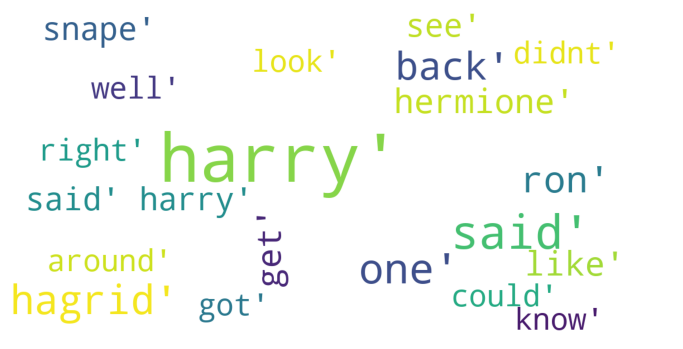

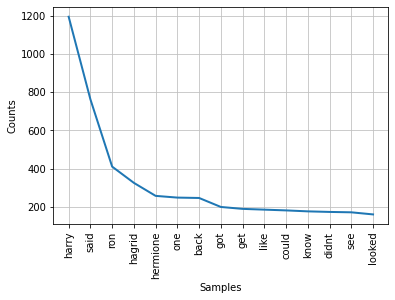

In [90]:
# Analysis of data
nltk.download('stopwords')
nltk.download('punkt')

# Function for punctuation list
function = str.maketrans('', '', string.punctuation)

def remove_stopwords(input_str): 
    stopwords_bag = set(stopwords.words("english")) # Downloading all the dfault stop words in english language
    tokens = word_tokenize(input_str) 
    final_text = [i for i in tokens if i not in stopwords_bag] # keep only those words which are not in stopword bag
    
    return final_text

def plot_wordcloud(tokens):
  wordcloud = WordCloud(background_color='white',max_words=20, max_font_size=40, scale=3).generate(str(tokens))
  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()


tokens_1 = text_tr.translate(function)
tokens_1 = remove_stopwords(tokens_1)

tokens_2 = text_ts_2.translate(function)
tokens_2 = remove_stopwords(tokens_2)

tokens_3 = text_ts_3.translate(function)
tokens_3 = remove_stopwords(tokens_3)

plot_wordcloud(tokens_1)


freqDist = nltk.FreqDist(tokens_1)
freqDist.plot(15)

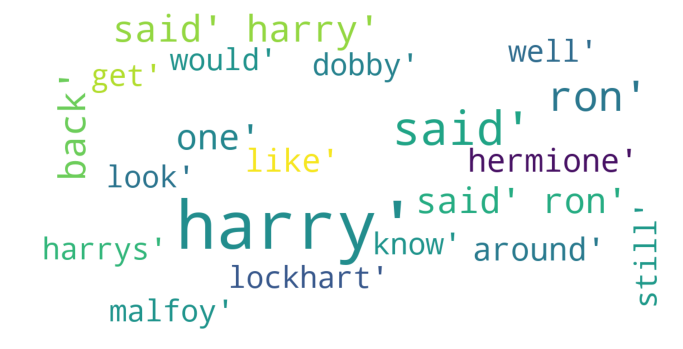

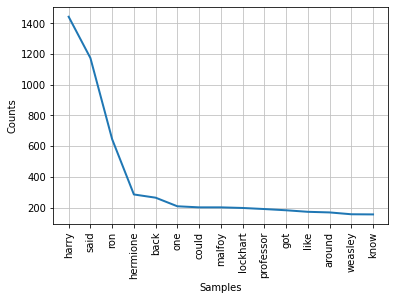

In [91]:
plot_wordcloud(tokens_2)

freqDist = nltk.FreqDist(tokens_2)
freqDist.plot(15)

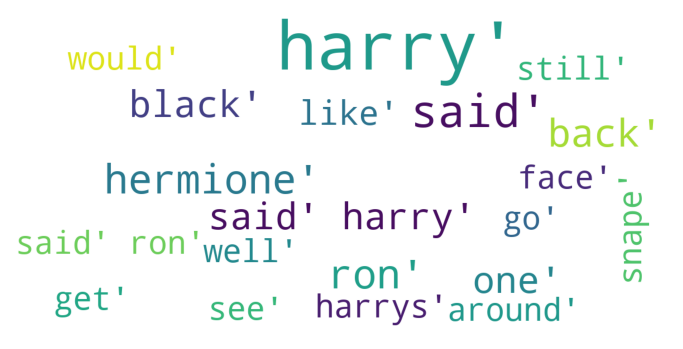

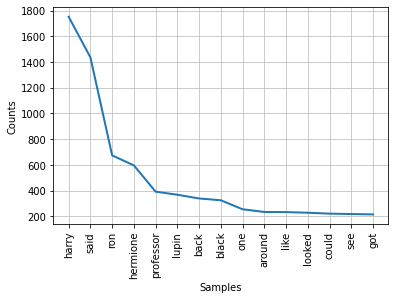

In [92]:
plot_wordcloud(tokens_3)

freqDist = nltk.FreqDist(tokens_3)
freqDist.plot(15)